## importing libraries

In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
from scipy import stats
from scipy.stats import norm, skew 
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')


## importing data sets

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Showing first 5 record from training dataset

In [3]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Finding shape of training dataset

In [4]:
train.shape

(1460, 81)

## So there are 1460 records and 81 attributes in training dataset

## Finding shape of testing dataset

In [5]:
test.shape

(1459, 80)

## So there are 1459 records and 80 attributes in testing dataset

## Let's drop the  'Id' column  as  it's unnecessary for  the prediction process.

In [6]:
train_ID = train['Id']
test_ID = test['Id']


train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


## Let's get information about the target variable 'SalePrice'

In [7]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

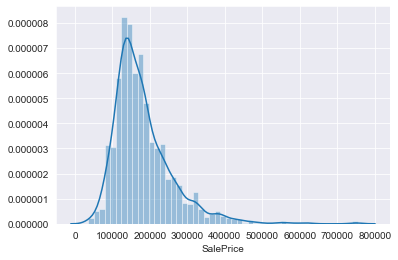

In [8]:
sns.distplot(train['SalePrice'])

## Let's generate the co-relation matrix

In [9]:
plt.figure(figsize=(25,25))
coRelMat = train.corr()['SalePrice']
coRelMat.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

<Figure size 1800x1800 with 0 Axes>

## Let's visualize SalePrice with respect to GLivArea

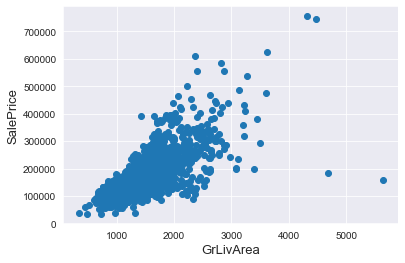

In [10]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## Let's delete the outlier of GrLivArea

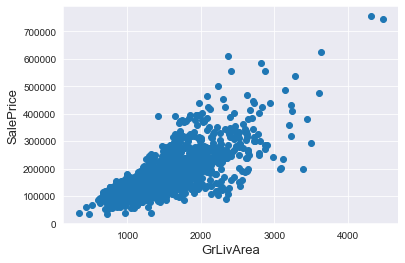

In [11]:

train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [12]:

train["SalePrice"] = np.log1p(train["SalePrice"])


## Let's concat train and test dataset

In [13]:

ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


## Let's find the missing ratio of first 20 columns

In [14]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageYrBlt,5.450806
GarageQual,5.450806
GarageCond,5.450806


## Let's plot the percent missing value of features

Text(0.5, 1.0, 'Percent missing data by feature')

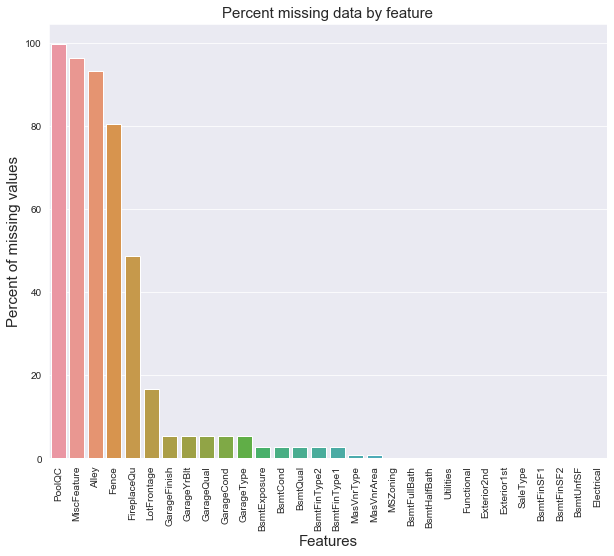

In [15]:

f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

## Let's visualize Co-relation using heat map

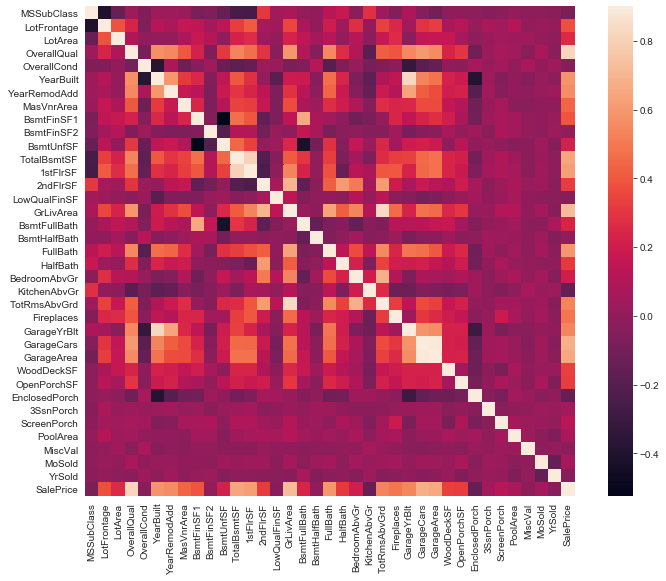

In [16]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

## Let's handle the missing values

In [17]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')    
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")    

## Let's fill the missing values of these columns with '0'

In [18]:

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)    

## Let's drop the utility column

In [19]:
all_data = all_data.drop(['Utilities'], axis=1)

## Let's fill the missing values in these columns with most common value

In [20]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [21]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [22]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

## Checking remaining missing values 

In [23]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


## We can see that now there is no missing value.

## Now let's transform these features into catagorical feature

In [24]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

## Applying Label encoder to these catagorical features

In [25]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))


In [26]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

## Skew in numerical features

In [27]:

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


## Now let's do Box Cox Transformation of (highly) skewed features

In [28]:

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


## Let's get dummy catagorical features

In [29]:

all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [30]:
train = all_data[:ntrain]
test = all_data[ntrain:]

## Importing libraries for models

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso, Ridge, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


## Defining method for evaluating performance for models

In [32]:
def evaluate_model(model):
    R2 = cross_val_score(model, train.values, y_train, cv=10 , scoring='r2')
    print(R2.mean())

## Building Simple Linear Regression model and it's performance evaluation

In [33]:
linearRegModel = LinearRegression()
evaluate_model(linearRegModel)

-9.49911301390281e+17


## Regularization with Lasso model and it's performance evaluation

In [34]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
evaluate_model(lasso)

0.9233912970891719


##  Regularization with Ridge model and it's performance evaluation

In [35]:
ridge = make_pipeline(RobustScaler(), Ridge(alpha =0.0005, random_state=1))
evaluate_model(ridge)

0.9078811451846794


##  Building Decission Tree Regressor model with no max depth restriction and its performance evaluatiom

In [36]:
from sklearn.tree import DecisionTreeRegressor  

decisionTreeRegressor = DecisionTreeRegressor(random_state = 0)
evaluate_model(decisionTreeRegressor)

0.7435939950454946


## Building Decission Tree Regressor model with maximum depth restriction and its performance evaluatiom

In [37]:
decisionTreeRegressor = DecisionTreeRegressor(max_depth = 10, random_state = 0)
evaluate_model(decisionTreeRegressor)

0.747904576570091


## Now let's build Random Forest Regressor model with various n_estimators and evalute its performance

When n_estimators = 10 :

In [38]:
randomForestModel = RandomForestRegressor(n_estimators=10, random_state=0)
evaluate_model(randomForestModel)

0.8663186874447983


 when n_estimators = 30:

In [39]:
randomForestModel = RandomForestRegressor(n_estimators=30, random_state=0)
evaluate_model(randomForestModel)

0.8782117787737223


when n_estimators = 50:

In [40]:
randomForestModel = RandomForestRegressor(n_estimators=50, random_state=0)
evaluate_model(randomForestModel)

0.8807556936328279


## Building Gradient Boosting model and it's performance evaluation

In [41]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
evaluate_model(GBoost)

0.9169379630667601


## Building Elastic net model and it's performance evaluation

In [42]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
evaluate_model(ENet)

0.9235005070534565


## Building Kernel Ridge model and its performance evaluation

In [43]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
evaluate_model(KRR)

0.9184730659813363


## Applying PCA

In [44]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(train.values)

## Checking improvement of decission tree regressor after applying PCA

In [45]:
decisionTreeRegressor = DecisionTreeRegressor(random_state = 0)
R2 = cross_val_score(decisionTreeRegressor, X_pca, y_train, cv=10 , scoring='r2')
print(R2.mean())

0.3970940653390298


## So we can see, applying PCA doesn't improve decession Tree Regressor

 ##  What is Ensemble learning? 
         

Ensemble learning combines multiple base models in order to produce one optimal predictive model.

## What is difference between Bagging and Boosting?

(1) Bagging trains a bunch of individual models in a parallel way. On the other hand, boosting trains a bunch of individual models in a sequential way.

(2) In bagging, each model is trained by a random subset of the data. On the other hand, in boosting each individual model learns from mistakes made by the previous model.

## Let's apply Voting Regressor which combines prevously used 4 model which are: Lasso, Ridge, Kernel  Ridge and Gradient Boosting

In [46]:
from sklearn.ensemble import VotingRegressor

modelList = []
model1 = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
modelList.append(('lasso', model1))
model2 = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
modelList.append(('ENet', model2))
model3 = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
modelList.append(('KRR', model3))
model4 = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5)
modelList.append(('GBoost', model4))

ensemble = VotingRegressor(modelList)
R2 = cross_val_score(ensemble, train.values, y_train, cv=10)
R2.mean()

0.9273698474071473

## So, we can see the Voting Regressor model has given the Best score

In [47]:
ensemble.fit(train.values, y_train)
predicted_prices = ensemble.predict(test.values)
predicted_prices.shape

(1459,)

## Generating submission file

In [48]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = predicted_prices
sub.to_csv('submission.csv',index=False)